In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


<h1><center>Differential Privacy</center></h1>
<h2><center>Cynthia Dwork</center></h2>

Presented by Mike Mull (@kwikstep)

Cynthia Dwork is a researcher with Microsoft.  She's one of the originators of differential privacy as well as the concept of proof-of-work (for spam prevention)

## The Problem

> " the goal of a privacy-preserving __statistical__ database is to enable the user to learn properties of the population as a whole, while protecting the privacy of the individuals in the sample"

The key word here is _statistical_.  The privacy being protected is the privacy of individuals with respect to statistical queries (counts, sums, means, etc).  These are usually not databases that allow you to look up an individual by a name or an SSN; _and_ it's often the case that the database user is someone beyond the control of the data curator.

### Why (I Think) This Paper is Interesting
- It is surprising (to me) that basic anonymization techniques do not suffice for privacy
- Privacy method that does not directly use cryptography
   - As opposed to encryption, secure function computation, zero-knowledge proofs
- A research result with interesting practical uses (as well as applications to other research problems)
- Topical: actually came up at a Senate data privacy hearing about a week ago (Sept. 26, 2018)
- I'm a bit of a privacy freak


### Outline

- Introduce the basics of privacy in statistical databases
- Informally cover the _impossibility proof_
- The formal definition of differential privacy
- Discuss methods for achieving differential privacy


### Objectives
- Show that privacy is not guaranteed by removing personally-identifiable info
- Understand that this method is _randomized_
- Understand that differential privacy involves trade-offs between privacy and accuracy
- Talk about composability and privacy budgets
- Don't talk about hash functions (inside joke)

## What Is Privacy?

### Dalenius
(_T. Dalenius, Towards a methodology for statistical disclosure control. StatistikTidskrift 15, pp. 429–222, 1977_)
> " access to a statistical database should not enable one to learn anything about an individual that could not be learned without access"


### ...but...
> "We show this type of privacy cannot be achieved. The obstacle is in auxiliary information, that is, information available to the adversary other than from access to the statistical database"

Dalenius stated the desired goal in a 1977 paper, which is unfortunately not online.  His stated goal anticipates what would later be called _semantic security_, which i'll cover below.

Dwork shows that the goal of Dalenius is impossible, for two reasons.  One is that the information conveyed by the privacy mechanism must have _utility_ to the person querying the database, which might be a legitimate analyst or an adversary looking to find a privacy breach.  The other is that _auxiliary information_ could be available that enables the adversary to breach privacy.


## Differential Privacy

>  "the risk to one’s privacy, or in general, any type of risk, such as the risk of being denied automobile insurance, should not substantially increase as a result of participating in a statistical database"

The ideal goal of Dalenius being impossible, Dwork (and Frank McSherry) proposed differential privacy.  It is _differential_ privacy because it promises that queries to this database will not be detectable different if one individual's data is added or removed.

Note that you might decide that you're OK with the privacy risks and so you give the study conductors a waiver to use your data provided they remove your PII.  But there might be consequences you don't expect down the line.  In her book on the topic Dwork says "ordinary facts are not OK".  She gives the example of a study that follows grocery purchases.  A participant that stops buying bread might be signaling a health issue.  The legal approach doesn't really work for the creators of the study either, since as my sister the lawyer says "You can't give people permission to be negligent"

### Semantic Security

From Wikipedia:
> In cryptography, a semantically secure cryptosystem is one where only negligible information about the plaintext can be feasibly extracted from the ciphertext. 

From _Introduction to Modern Cryptography_:
> an encryption scheme is secure if no adversary can compute any function of the plaintext from the ciphertext.


As mentioned above, the ideal privacy goal of Dalenius is similar to _semantic security_, and idea proposed in the early 80s to establish a realizable goal for encryption, since perfect secrecy is impractical.  I state the idea informally here leading up to the impossibility proof.

## Why Is Absolute Disclosure Prevention Impossible?

- Is it Terry Gross's fault?
  - The problem is _auxiliary information_ (Terry Gross is 2 inches shorter than the average Lithuanian woman)
  - With the auxiliary information _and_ access to the database through the privacy mechanism, privacy is breachable
  - With the auxiliary information no access to the database through the privacy mechanism, privacy is safe
- Contrast with another formulation of _semantic security_
  - Suppose i have information that i pass to an eavesdropper: the message is either _dog_ or _cat_
  - The eavesdropper can't determine which message it is from the cyphertext


### Interactive vs Non-Interactive

- Interactive: A process sitting in front of the actual database that can analyze a query before applying the privacy mechanism
- Non-Interactive: Data that has been
   - "Anonymized" or "de-identified" by removing names, zip codes, etc.
   - Perturbed
   - Sampled

### Types of Privacy Breach
- Linkage attack
   - Latanya Sweeney's deanonymizing attack connecting voter records to anonymized medical data
   - The Netflix challenge dataset
- Differencing attack
- Reconstruction attack

## The Impossibility Proof

The approach of the proof is to prove something that's contrary to the goal of Dalenius, using a technique that's similar to a proof of semantic security
- For semantic security: an adversary that receives cyphertext has no advantage over adversary simulator that receives nothing
- For privacy disclosure: in contrast, an adversary that receives the output of the privacy mechanism has an arbitrarily large advantage over an adversary simulator
  

The proof method in the paper probably looks very familiar to a cryptography researcher, but looks absolutely wacky to a neophyte.  

### The Adversary Simulator
> the definition of semantic security for encryption compares what can be learned by an adversary
who receives a real ciphertext to what can be learned by an adversary who receives nothing. The
definition states that an encryption scheme is secure if they can both learn approximately the same
amount of information. This is very strange.

[How To Simulate It – A Tutorial on the Simulation Proof Technique](https://eprint.iacr.org/2016/046.pdf), Yehuda Lindell, Feb. 2018

### The Pieces Needed For the Proof
- Database/Database distribution
- Privacy/sanitization mechanism
   - MUST be randomized
- Utility vector
- Privacy breach
- Auxiliary information generator
- Adversary
- Adversary Simulator

<img src='./DifferentialPrivacy.png'>

### The Utility Vector

>  it is clear that for the mechanism to be useful its output
should not be predictable by the user; in the case of randomized mechanisms the
same is true, but the unpredictability must not stem only from random choices
made by the mechanism.

> We can think of the utility vector as answers to questions about the data


The _utility vector_ is the answer to a query of the database through the privacy mechanism. This is probably the key piece that distinguishes this scenario from standard encryption. For the proof they formalize it as a bit vector, but you can think of it as a record or set of records.

The point i think they are trying to make here is that the privacy mechanism provides utility to the user/adversary, because it enables them to learn the answers to questions that are not otherwise learnable.  Cyphertex obviously need not have such a propery for an eavesdropper.

### Assumptions (very informally)
- Any database drawn from the distribution of databases has a privacy breach of length l bits
- The utility vector has enough randomness (entropy) to extract an l-bit uniform random variate
   - The utility vector w will be longer than l bits and fairly random, but not uniformly
- The chance of a function (Turing machine) finding a privacy breach with access through the privacy mechanism but without the auxiliary information is low

These are fairly reasonable assumptions.  For example, if a database doesn't have a privacy breach, you might as well release the whole database (what constitutes a database with no privacy breach?). The last assumption is a "non-triviality" condition, that is, the assumption that the privacy mechanism does provide some reasonable privacy protection in the absence of the auxiliary info.

### The Easy Case
- Auxiliary information generator finds a breach
- From the utility vector it extracts a uniformly distributed random value __r__ using _randomness extractor_
- Uses __r__ as a one-time pad to secretly pass the breach to the adversary
- Adversary also gets __r__ from utility vector, and so can recover the breach


This depends on something called a _strong randomness extractor_, which i won't talk about in detail (because hash functions).  The trick though is that it will generate an l-bit uniformly random value given that the utility vector has sufficient entropy.

### The Hard Case
- Auxiliary info generator and adversary get different utility vectors, w and w'.
- Use _fuzzy extractor_
   - Fuzzy extractors came out of biometric research as a way to generate key values from fuzzy data
- This case requires more entropy in the utility vector


In the hard case, the utility vector cannot be totally "learned", which i think means the adversary and the auxiliary information generator do not get a "true" answer (ie, there is noise, but different noise for each).

### Fuzzy Extractors

Two procedures:
 - Randomized procedure __Gen(w)__ creates R and P
 - Deterministic procedure __Rec()__ that will return R given P and w' that's close enough to w

The first time i Googled "fuzzy extractor" i got an advertisement for vacuum cleaners

## The Formal Definition of Differential Privacy


> A randomized function K gives &epsilon;-differential privacy if for all
data sets D1 and D2 differing on at most one element, and all S ⊆ Range(K),


$$
Pr[K(D_1) \in S] \le exp(\epsilon) \times Pr[K(D_2) \in S]
$$

In words, the probability of getting a particular query result from D1 is the same within a small factor of the probability of getting that result on D2

It helps me to think about this in terms of a database with no privacy mechanism at all.  Suppose there's a database that has, among other fields, a field that specifies which Type 2 diabetes drug a patient takes, with NULL meaning none.  If patient X, who takes metformin, is in D1 but not in D2, then a query like __SELECT count(1) WHERE type2_drug IS NOT NULL__  will produce the value n+1 for D1 and n for D2.  In this case, the probability of getting n+1 for D2 is 0.  What can a randomized privacy mechanism do to mask this difference?  One possibility is the "coin flip" option.  For each record where the field is not null, the privacy mechanism would flip a coin to decide whether or not to include that record in the count.

### It's All About The Epsilon
   - We want &epsilon; to be small for better privacy
   - However, small epsilon might require more noise and so will affect accuracy
   - &epsilon; is a parameter that can be chosen
   - log of ratio sometimes referred to as _privacy loss_ or _leakage_
   
### For small &epsilon; exp(&epsilon;) is roughly equal to (1 + &epsilon;)

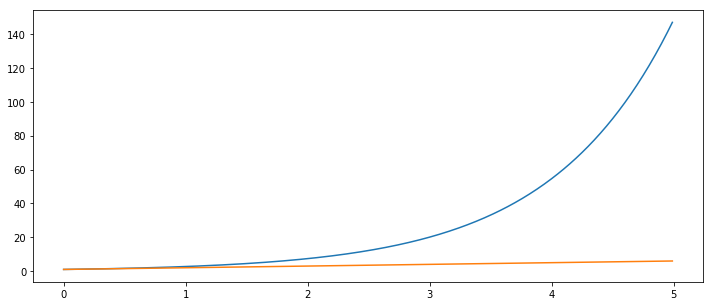

In [2]:
fig, ax = plt.subplots(figsize=(12,5))
x = np.arange(0,5.0,0.01)
_ = ax.plot(x, [np.exp(e) for e in x])
x = np.arange(0,5.0,0.01)
_ = ax.plot(x, [1.0 + e for e in x])

## L1 Sensitivity

> We will achieve &epsilon;-differential privacy by the addition of __random noise__ whose
magnitude is chosen as a function of the __largest change a single participant__ could have on the output to the query function; we refer to this quantity as the
_sensitivity_ of the function


### _Count queries have sensitivity <= 1_
``` SELECT count(1) FROM secret_data WHERE risk_of_badness > 0.5 ```

### _Other aggregates require analysis of the database_
``` SELECT SUM(vodkas_per_day) FROM liver_study ```

``` SELECT AVG(num_hashtags) FROM twitter_nonsense ```


In other words, we want to add enough random noise to obscure the differences between D1 and D2, but we also want the answer to still be somewhat near the truth.

### What Sort of Noise?

> The privacy mechanism, denoted Kf for a query function f, computes f(X) and adds noise with a scaled symmetric exponential distribution with variance σ

aka, _Laplacian_

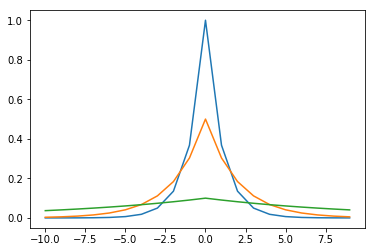

In [3]:
x = np.arange(-10.0,10.0,1.0)
_ = plt.plot(x, [np.exp(-np.abs(e - 0.0)) for e in x])
_ = plt.plot(x, [np.exp(-np.abs(e - 0.0)/2)/2 for e in x])
_ = plt.plot(x, [np.exp(-np.abs(e - 0.0)/10)/10 for e in x])

_"This distribution has independent coordinates, each of which is an exponentially
distributed random variable. The implementation of this mechanism thus simply
adds symmetric exponential noise to each coordinate of f(X)"_ 

And, yes, this means that even queries that would normally have integral values might have fractional noise added.

### How Much Noise?

> Theorem 4. For f : D → Rd, the mechanism Kf gives (__∆f /σ__)-differential privacy.

> To achieve &epsilon;-differential privacy, one must choose σ ≥ &epsilon;/∆f.

So, for a count query (where delta f = 1) we need to set sigma = (1/e)

The key thing to see here is that there's a tradeoff between privacy and noise.  If the function has high sensitivity, then to maintain privacy you have to choose a large sigma (more noise) to maintain the same epsilon.  

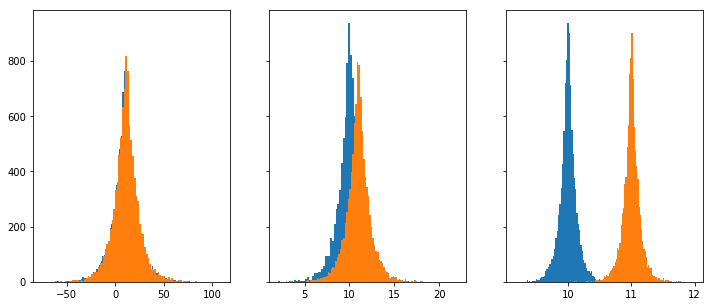

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,5))

def plot_f(ax, epsilon):
    d1 = np.random.laplace(10.0, 1.0 / epsilon, 10000)
    _ = ax.hist(d1,bins=100)
    d2 = np.random.laplace(11.0, 1.0 / epsilon, 10000)
    _ = ax.hist(d2,bins=100)

plot_f(ax1, 0.1)
plot_f(ax2, 1.0)
plot_f(ax3, 10.0)


Going back to our example with counts n and n+1, suppose that n is 10.  These plots show 10000 applications of Laplacian noise with epsilon = 0.1, 1, 10 to counts 10 and 11.  You can see that if the analyst could make this many queries they could determine the true value in each database, but you can also see that if they have only 1 query it would be hard to determine which database gave the response.

### Histogram Queries

```SELECT genre, COUNT(1) FROM track_play_history GROUP BY genre```

>Viewed naıvely, this is a set of k queries, each of sensitivity 1, so to ensure &epsilon;-differential privacy it follows ... that it suffices to use noise distributed according to a symmetric exponential with variance k/&epsilon; in each component.

> However, for any two databases D1 and D2 differing in only one element, ||f(D1) − f(D2)||<sub>1</sub> = 1, since only one cell of the histogram changes, and that cell only by 1.

I think they're trying to make the point here that you have to be careful in examining the sensitivity of a query, but they also make the point that successive queries require more noise, that is, k count queries would require k / epsilon noise to achieve epsilon-differential privacy.  This is also true if you let an analyst run k queries, or if you let k analysts run queries and then combine their results. I'll talk about this more below.

### Composition and Privacy Budgets

Each successive query gives the analyst more information and increases the privacy risk
 - An &epsilon;<sub>1</sub> query followed by an &epsilon;<sub>2</sub> query is &epsilon;<sub>1</sub> + &epsilon;<sub>2</sub> differentially private.
 - Practical differentially privacy systems give the analyst a _privacy budget_ that limits the number of queries

This is discussed directly in the paper, but the repeated application of the privacy mechanism is called _composition_, and it's one of the important features of differnential privacy that the risk to privacy is understood under composition, specifically it is linear in the number of queries.

### Adaptive Adversary

> We define the sensitivity of a query strategy F = {fρ : D → (R+) d} to be the largest sensitivity of any of its possible functions

An _adaptive_ adversary is one that is deciding on the query strategy in response to the noisy data returned by the privacy mechanism.  They prove that epsilon-differential privacy can be achieved here by choosing the maximum sensitivity of any of the query functions in the overall query strategy.

### Some Real World Uses
- PINQ (Privacy Integrated Queries)
- Uber
- Apple, Google, Facebook

<img src='./uberdiffpriv.png'>

This is a diagram from an Uber blog post for a system they've been building with some Berkeley researchers.

## References

- [Differential Privacy](https://www.microsoft.com/en-us/research/publication/differential-privacy/), Cynthia Dwork
- [The Algorithmic Foundations of Differential Privacy](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf), Dwork
- [On the Difficulty of Disclosure Prevention in Statistical Databases](http://www.wisdom.weizmann.ac.il/~naor/PAPERS/imp_disclosure.pdf), Cynthia Dwork, Moni Naor
- [Differential Privacy In A Bit More Detail](https://desfontain.es/privacy/differential-privacy-in-more-detail.html)
- [Uber Releases Open Source Project for Differential Privacy](https://medium.com/uber-security-privacy/differential-privacy-open-source-7892c82c42b6)
- [How To Simulate It – A Tutorial on the Simulation Proof Technique](https://eprint.iacr.org/2016/046.pdf), Yehuda Lindell
- [Towards Practical Differential Privacy for SQL Queries](https://arxiv.org/abs/1706.09479)
- T. Dalenius, Towards a methodology for statistical disclosure control. StatistikTidskrift 15, pp. 429–222, 1977